# Fama-French (3 - 5 ) and Carhart Model in Python

This script provides a presentation for the Fama-French Three-factor Model, the Fama-French Five-factor Model and contains an optional version of the Fama-French Three-factor Model including the Momentum. I aimed to establish this script to include ESG Factors as a further Factor but until now cannot hold of a model that provides a serious explenation based on public available data.

The Fama-French Three-factor Model is an extension of the Capital Asset Pricing Model (CAPM). The Fama-French model aims to describe stock returns through three factors: (1) market risk, (2) the outperformance of small-cap companies relative to large-cap companies, and (3) the outperformance of high book-to-market value companies versus low book-to-market value companies. The rationale behind the model is that high value and small-cap companies tend to regularly outperform the overall market.

The Fama/French five factors (2x3) are constructed using the 6 value-weight portfolios formed on size and book-to-market, the 6 value-weight portfolios formed on size and operating profitability, and the 6 value-weight portfolios formed on size and investment.

Carhart added a fourth factor for momentum which, while statistically significant, did not fit into Fama-French framework for invalidating the CAPM. This model is included as the third model based on the Three Factor Model.

The script is structured as follows
- Introduction (only technical issues)
- Get Stock Data from Public Domain (Yahoo)
- Get Fama French Market Data (for all three models)
- Cost of Equity (for all three models)
- Compaire the expected returns equities

## Introduction (only technical issues)

Install libraries in jupyter if necessary.

In [1]:
!pip install pandas
!pip install pandas_datareader
!pip install statsmodels
!pip install matplotlib
!pip install getFamaFrenchfactors 
!pip install seaborn

You should consider upgrading via the 'C:\Users\dimit\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\dimit\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\dimit\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\dimit\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\dimit\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\dimit\anaconda3\python.exe -m pip install --upgrade pip' command.


Import libraries to run the script.

In [2]:
import pandas as pd 
import numpy as np
import pandas_datareader.data as reader 
import datetime as dt 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
import getFamaFrenchFactors as gff 
import seaborn as sns 

## Get Stock Data from Public Domain (Yahoo)

Set the time frame for the request

https://finance.yahoo.com/quote/USOI?p=USOI&.tsrc=fin-srch

In [3]:
#end = dt.datetime.now() 
end = dt.date(2022, 2, 9)
start = dt.date(end.year - 6, end.month, end.day) 

Set the stocks

In [4]:
ticker = ['GOOG']
stock_prices = reader.get_data_yahoo(ticker, start, end)['Adj Close'] 
stock_prices.head()

Symbols,GOOG
Date,
2016-02-09,678.109985
2016-02-10,684.119995
2016-02-11,683.109985
2016-02-12,682.400024
2016-02-16,691.000000


Resample the record to monthly frequency.

In [5]:
stock_prices = stock_prices.resample('1M').last() 
stock_prices.head()

Symbols,GOOG
Date,
2016-02-29,697.770020
2016-03-31,744.950012
2016-04-30,693.010010
2016-05-31,735.719971
2016-06-30,692.099976


Compute to monthly returns.

In [6]:
stock_returns = stock_prices.pct_change() 
stock_returns = stock_returns.dropna() 
stock_returns.head()

Symbols,GOOG
Date,
2016-03-31,0.067615
2016-04-30,-0.069723
2016-05-31,0.061630
2016-06-30,-0.059289
2016-07-31,0.110808


## Get Fama French Market Data 

The library gets the data from the Kenneth French library and returns it as a Pandas dataframe.

https://github.com/vashOnGitHub/getFamaFrenchFactors
https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html

### 3 - Factor

The Fama French 3 factor model includes the:

Market Risk Premium (MRP)
Size Premium (i.e., Small minus Big) (SMB)
Value Premium (i.e., High Book-to-Market minus Low Book-to-Market)
The Risk-free rate (RF)

In [7]:
ff3_monthly = pd.DataFrame(gff.famaFrench3Factor(frequency='m'))
ff3_monthly.rename (columns={'date_ff_factors':'Date'}, inplace=True) 
ff3_monthly.set_index('Date', inplace = True) 
ff3_monthly

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-31,0.0296,-0.0238,-0.0273,0.0022
1926-08-31,0.0264,-0.0147,0.0414,0.0025
1926-09-30,0.0036,-0.0139,0.0012,0.0023
1926-10-31,-0.0324,-0.0013,0.0065,0.0032
1926-11-30,0.0253,-0.0016,-0.0038,0.0031
...,...,...,...,...
2021-12-31,0.0310,-0.0160,0.0322,0.0001
2022-01-31,-0.0625,-0.0593,0.1274,0.0000
2022-02-28,-0.0229,0.0218,0.0309,0.0000


Show if there are actually premiums.

In [8]:
ff3_market_premium = ff3_monthly['Mkt-RF'].mean() 
ff3_size_premium = ff3_monthly['SMB'].mean() 
ff3_value_premium= ff3_monthly['HML' ].mean() 
print(ff3_market_premium, ff3_size_premium, ff3_value_premium) 

0.006779652173913046 0.0019095652173913061 0.0035268695652173883


<AxesSubplot:xlabel='Date'>

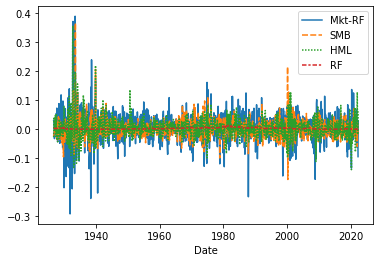

In [9]:
sns.lineplot(data=ff3_monthly)

### 5-Factor

The Fama French 5 factor returns:

Market Risk Premium (MRP)
Size Premium (i.e., Small minus Big) (SMB)
Value Premium (i.e., High Book-to-Market minus Low Book-to-Market)
Operating Profitability (i.e. Robust minus Weak) (RMW)
Conservative minus Aggressive Investments (CMA)
The Risk-free rate (RF)

In [10]:
df_ff5_monthly = gff.famaFrench5Factor(frequency='m')
df_ff5_monthly.rename (columns={'date_ff_factors':'Date'}, inplace=True) 
df_ff5_monthly.set_index('Date', inplace = True) 
df_ff5_monthly

,Mkt-RF,SMB,HML,RMW,CMA,RF
Date,,,,,,
1963-07-31,-0.0039,-0.0044,-0.0089,0.0068,-0.0123,0.0027
1963-08-31,0.0507,-0.0075,0.0168,0.0036,-0.0034,0.0025
1963-09-30,-0.0157,-0.0055,0.0008,-0.0071,0.0029,0.0027
1963-10-31,0.0253,-0.0137,-0.0014,0.0280,-0.0202,0.0029
1963-11-30,-0.0085,-0.0089,0.0181,-0.0051,0.0231,0.0027
...,...,...,...,...,...,...
2021-12-31,0.0310,-0.0069,0.0322,0.0475,0.0436,0.0001
2022-01-31,-0.0625,-0.0395,0.1274,0.0073,0.0773,0.0000
2022-02-28,-0.0229,0.0290,0.0309,-0.0212,0.0299,0.0000


<AxesSubplot:xlabel='Date'>

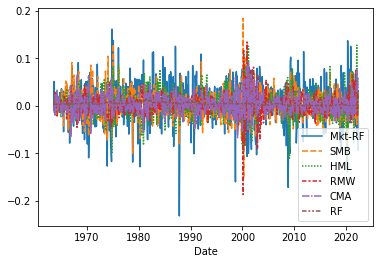

In [11]:
sns.lineplot(data=df_ff5_monthly)

### Momentum Factor and carhart4Factor


 Returns Fama French 3 factors (Market Risk Premium, SMB, HML), and Momentum

In [12]:
df_carhart4Factor_monthly = gff.carhart4Factor(frequency='m')
df_carhart4Factor_monthly.rename (columns={'date_ff_factors':'Date'}, inplace=True) 
df_carhart4Factor_monthly.set_index('Date', inplace = True) 
df_carhart4Factor_monthly

,Mkt-RF,SMB,HML,RF,MOM
Date,,,,,
1926-07-31,0.0296,-0.0238,-0.0273,0.0022,NaN
1926-08-31,0.0264,-0.0147,0.0414,0.0025,NaN
1926-09-30,0.0036,-0.0139,0.0012,0.0023,NaN
1926-10-31,-0.0324,-0.0013,0.0065,0.0032,NaN
1926-11-30,0.0253,-0.0016,-0.0038,0.0031,NaN
...,...,...,...,...,...
2021-12-31,0.0310,-0.0160,0.0322,0.0001,-0.0260
2022-01-31,-0.0625,-0.0593,0.1274,0.0000,-0.0250
2022-02-28,-0.0229,0.0218,0.0309,0.0000,0.0175


In [13]:
df_momentum_monthly = gff.momentumFactor(frequency='m')
df_momentum_monthly.rename (columns={'date_ff_factors':'Date'}, inplace=True) 
df_momentum_monthly.set_index('Date', inplace = True) 
df_momentum_monthly

,MOM
Date,
1927-01-31,0.0036
1927-02-28,-0.0214
1927-03-31,0.0361
1927-04-30,0.0430
1927-05-31,0.0300
...,...
2021-12-31,-0.0260
2022-01-31,-0.0250
2022-02-28,0.0175


<AxesSubplot:xlabel='Date'>

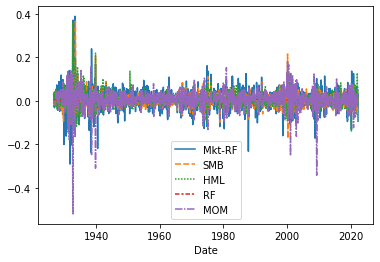

In [14]:
sns.lineplot(data=df_carhart4Factor_monthly)

<AxesSubplot:xlabel='Date'>

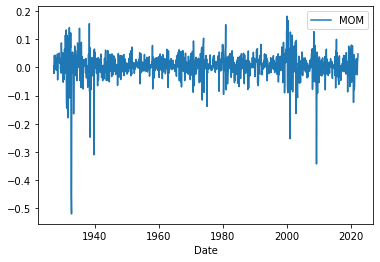

In [15]:
sns.lineplot(data=df_momentum_monthly)

## Cost of Equity

Merge the Market Data with the return of the requested stock.

### FF3 and Expected Return

In [16]:
d_ff3 = ff3_monthly.merge(stock_returns, on = 'Date') 
d_ff3.head() 
d_ff3 = d_ff3.tail(60) 
d_ff3.shape

(60, 5)

Compute the excess return on requested stock.

In [17]:
e_excess_return = d_ff3['GOOG'] - d_ff3['RF'] 
d_ff3['GOOG-RF'] = e_excess_return 
d_ff3.head() 

,Mkt-RF,SMB,HML,RF,GOOG,GOOG-RF
Date,,,,,,
2017-03-31,0.0017,0.0113,-0.0337,0.0003,0.007714,0.007414
2017-04-30,0.0109,0.0072,-0.0215,0.0005,0.092097,0.091597
2017-05-31,0.0106,-0.0255,-0.0376,0.0006,0.065014,0.064414
2017-06-30,0.0078,0.0224,0.0148,0.0006,-0.058174,-0.058774
2017-07-31,0.0187,-0.0146,-0.0022,0.0007,0.023957,0.023257


Setup the regression and fit FF3 to the model.

In [18]:
X = d_ff3[['Mkt-RF', 'SMB', 'HML']] 
y = d_ff3[ 'GOOG-RF' ] 

X1 = sm.add_constant(X) 

#constant 
model = sm.OLS(y, X1) 
 
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                GOOG-RF   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     21.91
Date:                Fri, 17 Jun 2022   Prob (F-statistic):           1.63e-09
Time:                        14:07:48   Log-Likelihood:                 102.16
No. Observations:                  60   AIC:                            -196.3
Df Residuals:                      56   BIC:                            -187.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0093      0.006      1.509      0.137      -0.003       0.022
Mkt-RF         1.0532      0.132      7.959      0.000       0.788       1.318
SMB           -0.2856      0.227     -1.258      0.214      -0.741       0.169
HML            0.0002      0.147      0.001      0.999      -0.295       0.296
==============================================================================
Omnibus:                        4.484   Durbin-Watson:                   2.428
Prob(Omnibus):                  0.106   Jarque-Bera (JB):                3.598
Skew:                           0.572   Prob(JB):                        0.165
Kurtosis:                       3.363   Cond. No.                         39.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
intercept, ff3_beta_m, ff3_beta_s, ff3_beta_v = results.params 
print(ff3_beta_m, ff3_beta_s, ff3_beta_v) 

1.0531819475412023 -0.2856188931900203 0.00017125439061219105


In [21]:
ff3_risk_free = d_ff3['RF'].mean()
ff3_market_premium = d_ff3['Mkt-RF'].mean()
ff3_size_premium = d_ff3['SMB'].mean()
ff3_value_premium = d_ff3['HML'].mean()
print (ff3_risk_free, ff3_market_premium, ff3_size_premium, ff3_value_premium)

0.0008466666666666671 0.011993333333333337 -0.00039166666666666587 -0.003793333333333331


In [22]:
r_ff3_exp_return = ff3_risk_free + ff3_beta_m*ff3_market_premium + ff3_beta_s*ff3_size_premium + ff3_beta_v * ff3_value_premium
#yearly return 
r_ff3_exp_return = r_ff3_exp_return * 12
r_ff3_exp_return 

0.1630685591882623

### FF5

Returns Fama French 5 factors (Market Risk Premium, SMB, HML, RMW, CMA), and the risk-free rate (RF)

In [23]:
d_ff5 = df_ff5_monthly.merge(stock_returns, on = 'Date') 
d_ff5.head() 
d_ff5 = d_ff5.tail(60) 
d_ff5.shape

(60, 7)

Compute the excess return on requested stock.

In [24]:
e_excess_return = d_ff5['GOOG'] - d_ff5['RF'] 
d_ff5['GOOG-RF'] = e_excess_return 
d_ff5.head() 

,Mkt-RF,SMB,HML,RMW,CMA,RF,GOOG,GOOG-RF
Date,,,,,,,,
2017-03-31,0.0017,0.0074,-0.0337,0.0063,-0.0094,0.0003,0.007714,0.007414
2017-04-30,0.0109,0.0047,-0.0215,0.0191,-0.0161,0.0005,0.092097,0.091597
2017-05-31,0.0106,-0.0304,-0.0376,0.0095,-0.0179,0.0006,0.065014,0.064414
2017-06-30,0.0078,0.0257,0.0148,-0.0226,0.0000,0.0006,-0.058174,-0.058774
2017-07-31,0.0187,-0.0162,-0.0022,-0.0059,-0.0016,0.0007,0.023957,0.023257


Setup the regression and fit the model.

In [25]:
X = d_ff5[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']] 
y = d_ff5[ 'GOOG-RF' ] 

X1 = sm.add_constant(X) 

#constant 
model = sm.OLS(y, X1) 
 
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                GOOG-RF   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     14.59
Date:                Fri, 17 Jun 2022   Prob (F-statistic):           4.84e-09
Time:                        14:08:31   Log-Likelihood:                 104.51
No. Observations:                  60   AIC:                            -197.0
Df Residuals:                      54   BIC:                            -184.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0117      0.006      1.900      0.063      -0.001       0.024
Mkt-RF         0.9813      0.153      6.432      0.000       0.675       1.287
SMB           -0.3796      0.268     -1.414      0.163      -0.918       0.159
HML            0.3327      0.206      1.614      0.112      -0.080       0.746
RMW           -0.1038      0.336     -0.309      0.759      -0.778       0.570
CMA           -0.7458      0.363     -2.054      0.045      -1.474      -0.018
==============================================================================
Omnibus:                        1.571   Durbin-Watson:                   2.390
Prob(Omnibus):                  0.456   Jarque-Bera (JB):                1.009
Skew:                           0.304   Prob(JB):                        0.604
Kurtosis:                       3.185   Cond. No.                         71.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Save the results in the model.

In [29]:
intercept, ff5_beta_m, ff5_beta_s, ff5_beta_v, ff5_beta_rw, ff5_beta_lh = results.params 
print(ff5_beta_m, ff5_beta_s, ff5_beta_v, ff5_beta_rw, ff5_beta_lh) 

0.9812775895888065 -0.37961646132727594 0.33271173068243043 -0.10378350087255822 -0.7457876511970764


In [30]:
ff5_risk_free = d_ff5['RF'].mean()
ff5_market_premium = d_ff5['Mkt-RF'].mean()
ff5_size_premium = d_ff5['SMB'].mean()
ff5_value_premium = d_ff5['HML'].mean()
ff5_robust_premium = d_ff5['RMW'].mean()
ff5_conservative_premium = d_ff5['CMA'].mean()
print (ff5_risk_free, ff5_market_premium, ff5_size_premium, ff5_value_premium, ff5_robust_premium, ff5_conservative_premium)

0.0008466666666666671 0.011993333333333337 -0.0010516666666666673 -0.003793333333333331 0.004091666666666666 0.00026833333333333326


In [31]:
r_ff5_exp_return = ff5_risk_free + ff5_beta_m*ff5_market_premium + ff5_beta_s*ff5_size_premium + ff5_beta_v * ff5_value_premium + ff5_beta_rw*ff5_robust_premium + ff5_beta_lh * ff5_conservative_premium
#yearly return 
r_ff5_exp_return = r_ff5_exp_return * 12
r_ff5_exp_return 

0.13353398632520988

### carhart4Factor (FF3 and Momentum)

In [32]:
d_c4 = df_carhart4Factor_monthly.merge(stock_returns, on = 'Date') 
d_c4.head() 
d_c4 = d_c4.tail(60) 
d_c4.shape

(60, 6)

In [33]:
e_excess_return = d_c4['GOOG'] - d_c4['RF'] 
d_c4['GOOG-RF'] = e_excess_return 
d_c4.head() 

,Mkt-RF,SMB,HML,RF,MOM,GOOG,GOOG-RF
Date,,,,,,,
2017-03-31,0.0017,0.0113,-0.0337,0.0003,-0.0102,0.007714,0.007414
2017-04-30,0.0109,0.0072,-0.0215,0.0005,0.0048,0.092097,0.091597
2017-05-31,0.0106,-0.0255,-0.0376,0.0006,0.0148,0.065014,0.064414
2017-06-30,0.0078,0.0224,0.0148,0.0006,-0.0009,-0.058174,-0.058774
2017-07-31,0.0187,-0.0146,-0.0022,0.0007,0.0162,0.023957,0.023257


In [34]:
X = d_c4[['Mkt-RF', 'SMB', 'HML', 'MOM']] 
y = d_c4[ 'GOOG-RF' ] 

X1 = sm.add_constant(X) 

#constant 
model = sm.OLS(y, X1) 
 
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                GOOG-RF   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     16.69
Date:                Fri, 17 Jun 2022   Prob (F-statistic):           5.20e-09
Time:                        14:08:48   Log-Likelihood:                 102.70
No. Observations:                  60   AIC:                            -195.4
Df Residuals:                      55   BIC:                            -184.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0086      0.006      1.393      0.169      -0.004       0.021
Mkt-RF         1.1087      0.143      7.732      0.000       0.821       1.396
SMB           -0.2398      0.232     -1.035      0.305      -0.704       0.224
HML            0.0951      0.175      0.543      0.589      -0.256       0.446
MOM            0.2006      0.200      1.004      0.320      -0.200       0.601
==============================================================================
Omnibus:                        4.605   Durbin-Watson:                   2.366
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                3.652
Skew:                           0.559   Prob(JB):                        0.161
Kurtosis:                       3.458   Cond. No.                         42.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
intercept, c4_beta_m, c4_beta_s, c4_beta_v, c4_beta_mom = results.params 
print(c4_beta_m, c4_beta_s, c4_beta_v, c4_beta_mom) 

1.108660493405422 -0.23979846232160068 0.09513410562117565 0.2005955999020297


In [37]:
c4_risk_free = d_c4['RF'].mean()
c4_market_premium = d_c4['Mkt-RF'].mean()
c4_size_premium = d_c4['SMB'].mean()
c4_value_premium = d_c4['HML'].mean()
c4_momentum_premium = d_c4['MOM'].mean()
print (c4_risk_free, c4_market_premium, c4_size_premium, c4_value_premium, c4_momentum_premium)

0.0008466666666666671 0.011993333333333337 -0.00039166666666666587 -0.003793333333333331 0.0018750000000000001


In [38]:
r_c4_exp_return = c4_risk_free + c4_beta_m*c4_market_premium + c4_beta_s*c4_size_premium + c4_beta_v * c4_value_premium + c4_beta_mom*c4_momentum_premium
#yearly return 
r_c4_exp_return = r_c4_exp_return * 12
r_c4_exp_return 

0.1710283674937397

## Expected Return Compaired 

Comparing ff3, ff5 and c4 model

In [39]:
pd.DataFrame(np.array([[r_ff3_exp_return, r_ff5_exp_return, r_c4_exp_return]]), 
             columns=['Three Factor Model', 'Five Factor Model', 'Carhart Four Factor'], 
             index=['Expected Return'])

,Three Factor Model,Five Factor Model,Carhart Four Factor
Expected Return,0.163069,0.133534,0.171028
